# 이미지 전처리


In [1]:
import pathlib
import uuid
from collections import Counter

import cv2
import numpy as np
from PIL import Image

# 데이터셋 초기 전처리

나온 얼굴만 뽑아내기 (얼굴 여러개 포함)


In [2]:
from facenet_pytorch import MTCNN


def face_extraction(image, mtcnn):
    # image = np.array(image)

    # Check the number of dimensions in the image
    if len(image.shape) == 3 and image.shape[2] == 4:
        # Convert the image from RGBA to RGB
        image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)

    # Detect faces
    boxes, _ = mtcnn.detect(image)

    faces = []
    if boxes is not None and len(boxes) > 0:
        for i, box in enumerate(boxes):
            box = [int(b) for b in box]
            face = image[box[1] : box[3], box[0] : box[2]]
            faces.append(face)
    return faces


mtcnn = MTCNN()

face_counter = Counter()

name_list = ["이승기", "남주혁", "박보영", "서강준"]

for who in name_list:
    pathlib.Path(f"faces/{who}_faces").mkdir(parents=True, exist_ok=True)
    for file in pathlib.Path(f"imgs/{who}_images").iterdir():
        image = cv2.imread(str(file))
        # image = Image.open(file)
        print(f"processing {file}")
        faces = face_extraction(image, mtcnn)
        for i, face in enumerate(faces):
            if face is not None and face.size != 0:
                cv2.imwrite(f"faces/{who}_faces/{uuid.uuid4()}_{i}.png", face)

processing imgs/이승기_images/이승기_197.jpeg
processing imgs/이승기_images/이승기_191.jpeg
processing imgs/이승기_images/이승기_143.jpeg
processing imgs/이승기_images/이승기_93.jpeg
processing imgs/이승기_images/이승기_260.jpeg
processing imgs/이승기_images/이승기_152.png
processing imgs/이승기_images/이승기_170.jpeg
processing imgs/이승기_images/이승기_123.jpeg
processing imgs/이승기_images/이승기_182.jpeg
processing imgs/이승기_images/이승기_271.jpeg
processing imgs/이승기_images/이승기_122.jpeg
processing imgs/이승기_images/이승기_28.jpeg
processing imgs/이승기_images/이승기_128.jpeg
processing imgs/이승기_images/이승기_242.jpeg
processing imgs/이승기_images/이승기_57.jpeg
processing imgs/이승기_images/이승기_198.jpeg
processing imgs/이승기_images/이승기_176.jpeg
processing imgs/이승기_images/이승기_174.jpeg
processing imgs/이승기_images/이승기_137.jpeg
processing imgs/이승기_images/이승기_29.jpeg
processing imgs/이승기_images/이승기_55.jpeg
processing imgs/이승기_images/이승기_172.jpeg
processing imgs/이승기_images/이승기_20.jpeg
processing imgs/이승기_images/이승기_97.jpeg
processing imgs/이승기_images/이승기_80.jpeg
processin

libpng warning: iCCP: known incorrect sRGB profile


processing imgs/박보영_images/박보영_135.png
processing imgs/박보영_images/박보영_98.jpeg
processing imgs/박보영_images/박보영_202.jpeg
processing imgs/박보영_images/박보영_247.jpeg
processing imgs/박보영_images/박보영_178.jpeg
processing imgs/박보영_images/박보영_84.jpeg
processing imgs/박보영_images/박보영_243.jpeg
processing imgs/박보영_images/박보영_238.jpeg
processing imgs/박보영_images/박보영_92.jpeg
processing imgs/박보영_images/박보영_22.jpeg
processing imgs/박보영_images/박보영_97.jpeg
processing imgs/박보영_images/박보영_62.jpeg
processing imgs/박보영_images/박보영_269.jpeg
processing imgs/박보영_images/박보영_74.jpeg
processing imgs/박보영_images/박보영_123.jpeg
processing imgs/박보영_images/박보영_156.png
processing imgs/박보영_images/박보영_64.jpeg
processing imgs/박보영_images/박보영_133.jpeg
processing imgs/박보영_images/박보영_162.jpeg
processing imgs/박보영_images/박보영_274.png
processing imgs/박보영_images/박보영_106.jpeg
processing imgs/박보영_images/박보영_46.jpeg
processing imgs/박보영_images/박보영_160.jpeg
processing imgs/박보영_images/박보영_101.jpeg
processing imgs/박보영_images/박보영_120.jpeg
processing i

In [ ]:
# from sklearn.metrics.pairwise import cosine_similarity

# 얼굴 빈도가 적은 파일 삭제 (패스함. 그대신 손으로 했음)


In [ ]:
# import face_recognition

# # Load known face encodings and labels
# known_face_encodings = ...
# known_face_labels = ...

# def face_extraction_and_recognition(image, mtcnn):
#     # Detect faces
#     boxes, _ = mtcnn.detect(image)

#     faces = []
#     if boxes is not None:
#         for i, box in enumerate(boxes):
#             box = [int(b) for b in box]
#             face = image[box[1] : box[3], box[0] : box[2]]
#             # Compute face encoding
#             face_encoding = face_recognition.face_encodings(face)
#             # Compare face encoding with known face encodings
#             matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
#             if True in matches:
#                 matched_label = known_face_labels[matches.index(True)]
#                 faces.append((face, matched_label))
#     return faces

# face_counter = Counter()

# for who in name_list:
#     pathlib.Path(f"faces/{who}_faces").mkdir(parents=True, exist_ok=True)
#     for file in pathlib.Path(f"imgs/{who}_images").iterdir():
#         image = cv2.imread(str(file))
#         print(f"processing {file}")
#         faces = face_extraction_and_recognition(image, mtcnn)
#         for i, (face, label) in enumerate(faces):
#             if face is not None and face.size != 0 and label == who:
#                 cv2.imwrite(f"faces/{who}_faces/{uuid.uuid4()}_{i}.png", face)
#                 face_counter[who] += 1

In [ ]:
# name_list = ["이승기", "남주혁", "박보영", "서강준"]

# # for other survived files, grayscale and resize
# for who in name_list:
#     pathlib.Path(f"faces/{who}_faces_resized").mkdir(parents=True, exist_ok=True)
#     for file in pathlib.Path(f"faces/{who}_faces").iterdir():
#         image = cv2.imread(str(file))
#         gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY, cv2.IMREAD_GRAYSCALE)
#         resized = cv2.resize(gray, (299, 299))
#         cv2.imwrite(f"faces/{who}_faces_resized/{file.name}", resized)

# 파이토치로 학습


In [1]:
# import os
# import random

from torch.utils.data import DataLoader
from torchvision import transforms
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder

# from torch.utils.data import Subset

data_dir = "faces"


# INSTEAD OF CALCULATING THE MINIMUM CLASS SAMPLES, USE THE WHOLE DATASET
# EXCEPT 박보영, TOTAL NUMBER OF IMAGES FOR EACH CLASS IS ABOUT 200

# def get_min_class_samples(data_dir):
#     class_counts = {}
#     for class_name in os.listdir(data_dir):
#         class_dir = os.path.join(data_dir, class_name)
#         if os.path.isdir(class_dir):
#             class_counts[class_name] = len(os.listdir(class_dir))

#     min_class_count = min(class_counts.values())

#     return min_class_count


# def create_balanced_dataset(dataset, min_class_count):
#     targets = dataset.targets
#     class_indices = {cls: [] for cls in set(targets)}
#     for idx, label in enumerate(targets):
#         class_indices[label].append(idx)

#     balanced_indices = []
#     for indices in class_indices.values():
#         balanced_indices.extend(random.sample(indices, min_class_count))

#     return Subset(dataset, balanced_indices)


# Define your transformations
train_transforms = transforms.Compose(
    [
        transforms.Resize((342, 342), transforms.InterpolationMode.BILINEAR),
        transforms.CenterCrop(299),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(40),
        transforms.RandomAffine(0, shear=20, scale=(0.8, 1.2)),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

validation_transforms = transforms.Compose(
    [
        transforms.Resize((342, 342), transforms.InterpolationMode.BILINEAR),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

dataset = ImageFolder(data_dir, transform=train_transforms)
# min_class_samples = get_min_class_samples(data_dir)
# balanced_dataset = create_balanced_dataset(dataset, min_class_samples)


# Split the data into training and validation sets
total_size = len(dataset)
train_size = int(0.65 * total_size)
valid_size = total_size - train_size

train_dataset, valid_dataset = random_split(dataset, [train_size, valid_size])

valid_dataset.dataset.transform = validation_transforms

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=True)

print(ImageFolder(data_dir).class_to_idx)

{'남주혁_faces': 0, '박보영_faces': 1, '서강준_faces': 2, '이승기_faces': 3}


In [2]:
import torch
from torch import nn, optim
from torchvision import models
from torch.utils.tensorboard import SummaryWriter

# Create a SummaryWriter object
writer = SummaryWriter()

print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained model
model = models.inception_v3(weights="DEFAULT")

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False

# Modify the last layer
num_classes = len(dataset.classes)  # 4

model.fc = nn.Sequential(
    nn.Flatten(),
    nn.Linear(model.fc.in_features, 1024),
    nn.LeakyReLU(),
    nn.Dropout(0.12),
    nn.Linear(1024, num_classes),
    nn.LogSoftmax(dim=1),
)

model = model.to(device)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(model.parameters(), lr=0.0048, weight_decay=0.0004)

# Train the model
epochs = 122
train_losses, valid_losses, accuracies = [], [], []
for epoch in range(epochs):
    model.train()
    train_loss = 0
    train_accuracy = 0
    for inputs, labels in train_loader:
        inputs, labels = (
            inputs.to(device),
            labels.to(device),
        )  # Move inputs and labels to device
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        ps = torch.exp(outputs.logits)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        train_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

    writer.add_scalar("Loss/train", train_loss / len(train_loader), epoch)

    # Validate the model
    model.eval()
    valid_loss = 0
    accuracy = 0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
            ps = torch.exp(outputs)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

    writer.add_scalar("Loss/valid", valid_loss / len(valid_loader), epoch)
    writer.add_scalar("Accuracy/valid", accuracy / len(valid_loader), epoch)

    train_losses.append(train_loss / len(train_loader))
    valid_losses.append(valid_loss / len(valid_loader))
    accuracies.append(accuracy / len(valid_loader))

    print(
        f"Epoch {epoch+1}/{epochs}.. "
        f"Train loss: {train_loss/len(train_loader):.3f}.. "
        f"Train accuracy: {train_accuracy/len(train_loader):.3f}.. "
        f"Validation loss: {valid_loss/len(valid_loader):.3f}.. "
        f"Validation accuracy: {accuracy/len(valid_loader):.3f}"
    )

writer.close()

2024-04-12 02:24:53.564253: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-12 02:24:53.601508: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-12 02:24:54.256631: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


True
NVIDIA GeForce RTX 4090
Epoch 1/122.. Train loss: 2.763.. Train accuracy: 0.301.. Validation loss: 1.363.. Validation accuracy: 0.255
Epoch 2/122.. Train loss: 1.334.. Train accuracy: 0.391.. Validation loss: 1.374.. Validation accuracy: 0.333
Epoch 3/122.. Train loss: 1.216.. Train accuracy: 0.474.. Validation loss: 1.174.. Validation accuracy: 0.544
Epoch 4/122.. Train loss: 1.144.. Train accuracy: 0.531.. Validation loss: 1.125.. Validation accuracy: 0.587
Epoch 5/122.. Train loss: 1.147.. Train accuracy: 0.492.. Validation loss: 1.395.. Validation accuracy: 0.354
Epoch 6/122.. Train loss: 1.027.. Train accuracy: 0.592.. Validation loss: 1.018.. Validation accuracy: 0.631
Epoch 7/122.. Train loss: 1.036.. Train accuracy: 0.570.. Validation loss: 1.019.. Validation accuracy: 0.595
Epoch 8/122.. Train loss: 0.971.. Train accuracy: 0.640.. Validation loss: 1.096.. Validation accuracy: 0.545
Epoch 9/122.. Train loss: 0.902.. Train accuracy: 0.690.. Validation loss: 0.931.. Validati

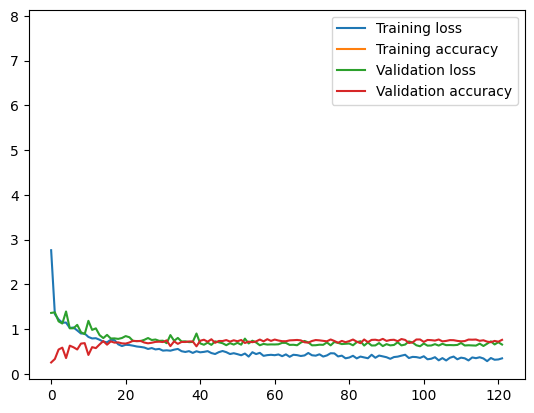

In [3]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label="Training loss")
plt.plot(train_accuracy, label="Training accuracy")
plt.plot(valid_losses, label="Validation loss")
plt.plot(accuracies, label="Validation accuracy")
plt.legend()
plt.show()

In [4]:
# Initialize the number of correct predictions
correct_preds = 0
total_preds = 0

# No need to track gradients for validation, we're not optimizing.
with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Get the predicted class with the highest score
        _, predictions = torch.max(outputs, 1)

        # Count number of correct predictions
        correct_preds += (predictions == labels).sum().item()
        total_preds += labels.size(0)

# Calculate accuracy
accuracy = correct_preds / total_preds
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 76.08%


In [6]:
from PIL import Image
import cv2
from facenet_pytorch import MTCNN


def face_extraction(image, mtcnn):
    # image = np.array(image)

    # Check the number of dimensions in the image
    if len(image.shape) == 3 and image.shape[2] == 4:
        # Convert the image from RGBA to RGB
        image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)

    # Detect faces
    boxes, _ = mtcnn.detect(image)

    faces = []
    if boxes is not None and len(boxes) > 0:
        for i, box in enumerate(boxes):
            box = [int(b) for b in box]
            face = image[box[1] : box[3], box[0] : box[2]]
            faces.append(face)
    return faces


mtcnn = MTCNN()

# Define the transformations
transform = transforms.Compose(
    [
        transforms.Resize((342, 342), transforms.InterpolationMode.BILINEAR),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

# Load the image
image = cv2.imread("/mnt/c/Users/craft/Downloads/wwww/NamJoohyuk158.jpg")
image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)

# crop the face
faces = face_extraction(image, mtcnn)
if len(faces) == 0:
    print("No face detected")

# Apply the transformations
input_images = [transform(Image.fromarray(face)).unsqueeze(0) for face in faces]

for i, input_image in enumerate(input_images):
    # Move the input image to the GPU if available
    input_image = input_image.to(device)
    # Make the prediction
    with torch.no_grad():
        model.eval()
        outputs = model(input_image)
        predictions = torch.exp(outputs)

    class_labels = ["남주혁", "박보영", "서강준", "이승기"]
    _, predict_class_index = torch.max(predictions, 1)
    predict_label = class_labels[predict_class_index]
    print(predictions)

    print(
        f"당신이 {predict_label}일 확률은 {predictions[0][predict_class_index].item() * 100:.2f}% 입니다."
    )

tensor([[0.7583, 0.0024, 0.1320, 0.1073]], device='cuda:0')
당신이 남주혁일 확률은 75.83% 입니다.


In [7]:
import pathlib

pathlib.Path("./model").mkdir(parents=True, exist_ok=True)
torch.save(model, "./model/model.pth")